# ID2223 TensorFlow Lab 2

Tianze Wang

## Table of contents
1. A Quick Recap
2. Introduction to Computer Vision
3. Introduction to Convolutions
4. Convolutional Neural Networks
5. More Complex Images

## Section 1: A Quick Recap

Consider the following sets of numbers. What is the ``relationship`` between them?


|  x  |   y |
| --- | --- |
| -1 | -2 |
| 0 | 1 |
| 1 | 4 |
| 2 | 7 |
| 3 | 10 |
| 4 | 13 |


Now let's look at how to train a ``ML model`` to spot the patterns between these items of data.

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


### Prepare training Data

|  x  |   y |
| --- | --- |
| -1 | -2 |
| 0 | 1 |
| 1 | 4 |
| 2 | 7 |
| 3 | 10 |
| 4 | 13 |


In [2]:
# training data
X_train = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y_train = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

### Define the model

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

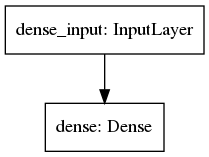

In [4]:
# plot the model
tf.keras.utils.plot_model(model)

In [5]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Train and evaluate

In [6]:
model.fit(X_train, y_train, epochs=500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 1s 83ms/sample - loss: 100.5586
Epoch 2/500
6/6 [==============================] - 0s 281us/sample - loss: 79.1242
Epoch 3/500
6/6 [==============================] - 0s 248us/sample - loss: 62.2604
Epoch 4/500
6/6 [==============================] - 0s 277us/sample - loss: 48.9926
Epoch 5/500
6/6 [==============================] - 0s 263us/sample - loss: 38.5540
Epoch 6/500
6/6 [==============================] - 0s 265us/sample - loss: 30.3412
Epoch 7/500
6/6 [==============================] - 0s 243us/sample - loss: 23.8796
Epoch 8/500
6/6 [==============================] - 0s 266us/sample - loss: 18.7957
Epoch 9/500
6/6 [==============================] - 0s 251us/sample - loss: 14.7958
Epoch 10/500
6/6 [==============================] - 0s 246us/sample - loss: 11.6487
Epoch 11/500
6/6 [==============================] - 0s 258us/sample - loss: 9.1726
Epoch 12/500
6/6 [==============================] - 0s 271us/sample

In [7]:
print(model.predict([10]))

[[30.99634]]


In [8]:
model.evaluate([10, 11], [31, 34])

2/1 [============================================================] - 0s 19ms/sample - loss: 1.5486e-05


1.548644831927959e-05

![alt text](https://i.pinimg.com/474x/c8/a2/3b/c8a23bc7ca2162ed1bdf77da27e059c4.jpg)

## Section 2: Introduction to Computer Vision

In the previous section, we have seen how to use neural networks to ``map`` the relationship between two variables (i.e., x and y).

However, in that instance, it is a bit of ``overkill`` because it would have been easier to write the funtion $$y = 3x + 1$$ , insteal of using ML to learn the relationship bwtween $x$ and $y$ for a fixed set of values.

But what if we are dealing with a case where writing ``rules`` like $y = 3x + 1$ is much more difficult? ``Computre Vision`` problems serve as good examples in this case. Let's take a look at a scenario where we want to ``recognize different items of clothing``, trained from a dataset containing 10 different types.

### A new dataset: ``Fashion MNIST``

We will train a neural network to recognize items of clothing from a common dataset called ``Fashion MNIST``. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:



![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [9]:
# The Fashion MNIST data is available directly in the tf.keras.datasets API.
mnist_dataset = tf.keras.datasets.fashion_mnist

In [10]:
# The load_data() function of this object will give two sets of two lists, which will be the training and testing data
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

In [11]:
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (60000, 28, 28)
Shape of y_train =  (60000,)
Shape of X_test =  (10000, 28, 28)
Shape of y_test =  (10000,)


In [12]:
print(y_train[0])
print(X_train[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

### Visualizing the dataset

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

Note that the values in the image are between 0 and 255. When training a neural network, it is easier that if we can convert every values to between 0 and 1, which is a process normally referred to as ``normalizing``.

In [14]:
print("Before normalizing: ")
print("\t min of train is {}, max of train is {}".format(np.min(X_train), np.max(X_train)))
print("\t min of test is {}, max of test is {}".format(np.min(X_test), np.max(X_test))) 

X_train = X_train/255
X_test = X_test/255

print("After normalizing: ")
print("\t min of train is {}, max of train is {}".format(np.min(X_train), np.max(X_train)))
print("\t min of test is {}, max of test is {}".format(np.min(X_test), np.max(X_test))) 

Before normalizing: 
	 min of train is 0, max of train is 255
	 min of test is 0, max of test is 255
After normalizing: 
	 min of train is 0.0, max of train is 1.0
	 min of test is 0.0, max of test is 1.0


### Define a Simple Model

In [15]:
# define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Compile the Model

In [16]:
# compile the model
model.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [17]:
# train for 5 epochs
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.7262 - accuracy: 0.7646
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5120 - accuracy: 0.8257
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4673 - accuracy: 0.8391
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4413 - accuracy: 0.8473
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4237 - accuracy: 0.8523


### Prediction and evaluation

In [18]:
# prediction on unseen data
classifications = model.predict(X_test)

print(classifications[0])
print("True label is ", y_test[0])
print("The predicted label is ", np.argmax(classifications[0]))

[6.1371834e-06 5.3822987e-06 2.2927459e-05 1.4726579e-05 3.2771393e-05
 1.2220984e-01 3.7627553e-05 2.0355219e-01 3.1983317e-03 6.7092007e-01]
True label is  9
The predicted label is  9


In [19]:
# evaluation on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("loss on test set is : ", loss)
print("accuracy on test set is : ", acc)

loss on test set is :  0.46832855386734007
accuracy on test set is :  0.835


### More Neurons!

In [20]:
# the data
(X_train, y_train),  (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

In [21]:
# define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [22]:
# compile the model
model.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# train the model
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6921 - accuracy: 0.7803
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4919 - accuracy: 0.8326
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4494 - accuracy: 0.8465
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4254 - accuracy: 0.8539
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4073 - accuracy: 0.8589


In [24]:
# a single prediction
predictions = model.predict(X_test)

print(predictions[0])
print("The predicted label is ", np.argmax(predictions[0]))

[1.9249244e-05 6.1692431e-06 1.4664596e-05 1.8101004e-05 1.1594844e-05
 6.8941198e-02 8.1725571e-05 1.6245323e-01 4.3602479e-03 7.6409376e-01]
The predicted label is  9


In [25]:
print("True label is ", y_test[0])

True label is  9


In [26]:
# evaluation on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("loss on test set is : ", loss)
print("accuracy on test set is : ", acc)

loss on test set is :  0.4479954786300659
accuracy on test set is :  0.8365


### Let's go DEEP! More Layers!

In [27]:
# get the data
(X_train, y_train),  (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
# define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [29]:
# compile the model
model.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# train the model
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6683 - accuracy: 0.7832
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4641 - accuracy: 0.8392
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4222 - accuracy: 0.8535
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3952 - accuracy: 0.8619
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3748 - accuracy: 0.8689


In [31]:
# a single prediction
classifications = model.predict(X_test)

print(classifications[0])
print("True label is ", y_test[0])
print("The predicted label is ", np.argmax(classifications[0]))

[7.9537254e-05 9.5243431e-06 1.7104445e-05 9.7030288e-06 1.6997205e-05
 5.9466671e-02 7.3621552e-05 9.4934940e-02 2.2143116e-03 8.4317756e-01]
True label is  9
The predicted label is  9


In [32]:
# evaluation on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("loss on test set is : ", loss)
print("accuracy on test set is : ", acc)

loss on test set is :  0.41399413900375365
accuracy on test set is :  0.8549


## Section 3: Convolutions

### Limitations of the previous DNN
In the previous section, we saw how to train an image classifier for fashion items using the ``Fashion MNIST`` dataset. 
This gave us a pretty accuract classifier, but there was an obvious constraint: the images were 28x28, grey scale and the item was centered in the image. 

For example here are a couple of the images in Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

The DNN that you created simply learned from the raw pixels what made up a sweater, and what made up ``a boot`` in this context. But consider how it might classify this image?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 greyscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the ``features`` that make up what a boot is.

That's where ``Convolutions`` are very powerful. A convolution is a filter that passes over an image, processing it, and extracting features that show a commonolatity in the image. In this lab you'll see how they work, but processing an image to see if you can extract features from it!

Generating convolutions is very simple -- we simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

So, for example, consider this:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)

### Let's explore a bit

In [33]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

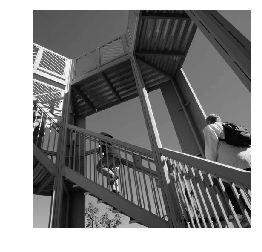

In [34]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

Now we can create a filter as a 3x3 array. 

In [35]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [36]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

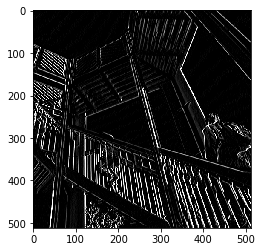

In [37]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

![Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)


### Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to ``reduce`` the overall amount of information in an image, while maintaining the features that are detected as present. 

There are a number of different types of pooling, but for this lab we'll use one called ``MAX pooling``. 

 The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

This code will show a (2, 2) pooling.Run it to see the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!


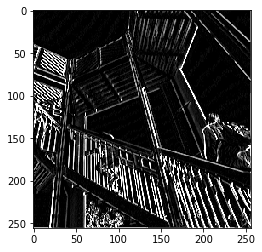

In [38]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    

## Section 4: Improving accuracy using Convolutions

In the previous lessons we saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. 

We experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

In [39]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss on test set is ", loss)
print("Accuracy on test set is", acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4982 - accuracy: 0.8251
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3751 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3399 - accuracy: 0.8762
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3120 - accuracy: 0.8858
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2953 - accuracy: 0.8912
Loss on test set is  0.33716665300130844
Accuracy on test set is 0.8782


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [40]:
# prepare the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train / 255.0
X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test / 255.0

In [41]:
# define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [42]:
# complie the model
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [43]:
# train the model
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4478 - accuracy: 0.8368
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2946 - accuracy: 0.8915
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2487 - accuracy: 0.9082
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2172 - accuracy: 0.9196
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1896 - accuracy: 0.9291


In [44]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss on test set is ", loss)
print("Accuracy on test set is", acc)

Loss on test set is  0.256759460413456
Accuracy on test set is 0.9092


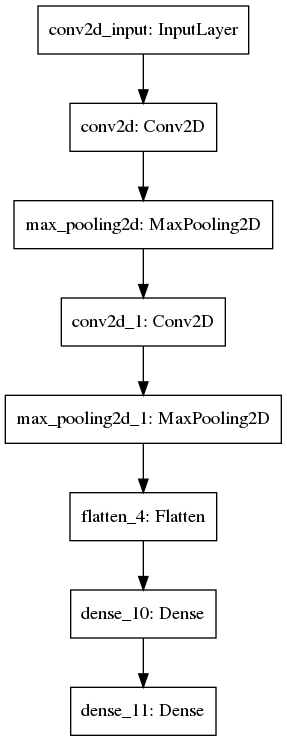

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model)

## Section 5: Using Convolutions with Complex Images

In Fashion MNIST classification, the subject is always in the ``center`` of a 28x28 image.

In this section, we will take it to the next level, training to recognize features in an image where the subject can be ``anywhere`` in the image!

Building a ``horses-or-humans`` classifier that will tell you if a given image contains a horse or a human, where the network is trained to recognize features that determine which is which.


### Get the dataset

In [46]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./data/horse-or-human.zip

--2019-11-20 23:11:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.207.240, 2a00:1450:400f:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.207.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./data/horse-or-human.zip’

./data/horse-or-hum 100%[===================>] 142.65M  11.6MB/s    in 14s     

2019-11-20 23:11:25 (10.3 MB/s) - ‘./data/horse-or-human.zip’ saved [149574867/149574867]



In [47]:
import os
import zipfile

local_zip = './data/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('./data/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./data/horse-or-human/humans')

In [48]:
# a pick view of the data
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse21-2.png', 'horse42-5.png', 'horse32-4.png', 'horse34-3.png', 'horse09-6.png', 'horse37-4.png', 'horse17-6.png', 'horse47-1.png', 'horse11-3.png', 'horse36-8.png']
['human14-14.png', 'human04-19.png', 'human09-13.png', 'human14-27.png', 'human16-28.png', 'human17-24.png', 'human17-25.png', 'human01-09.png', 'human13-30.png', 'human06-28.png']


In [49]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


### Visualization

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

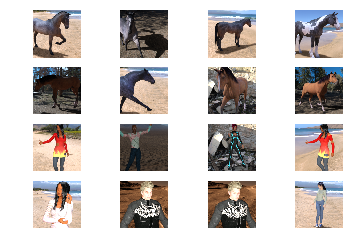

In [51]:
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

### Data Preprocessing

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './data/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


### Building a Small Model from Scratch

In [53]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)       

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [55]:
from tensorflow.keras.optimizers import RMSprop

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Train the model

In [56]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 674ms/step - loss: 0.8548 - acc: 0.5495
Epoch 2/15
8/8 [==============================] - 5s 622ms/step - loss: 1.0103 - acc: 0.7363
Epoch 3/15
8/8 [==============================] - 4s 489ms/step - loss: 0.5951 - acc: 0.6641
Epoch 4/15
8/8 [==============================] - 5s 648ms/step - loss: 0.7138 - acc: 0.7822
Epoch 5/15
8/8 [==============================] - 4s 538ms/step - loss: 0.5539 - acc: 0.8088
Epoch 6/15
8/8 [==============================] - 5s 644ms/step - loss: 0.2026 - acc: 0.9189
Epoch 7/15
8/8 [==============================] - 5s 607ms/step - loss: 0.4190 - acc: 0.8365
Epoch 8/15
8/8 [==============================] - 5s 572ms/step - loss: 0.7095 - acc: 0.8298
Epoch 9/15
8/8 [==============================] - 5s 566ms/step - loss: 0.2591 - acc: 0.8999
Epoch 10/15
8/8 [==============================] - 5s 569ms/step - loss: 0.1090 - acc: 0.9555
Epoch 11/15
8/8 [==============================] - 5s 568ms/step - lo

### Runing the Model

In [57]:
# import numpy as np
# # from google.colab import files
# from keras.preprocessing import image

# # uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a human")
#   else:
#     print(fn + " is a horse")

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/home/bw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


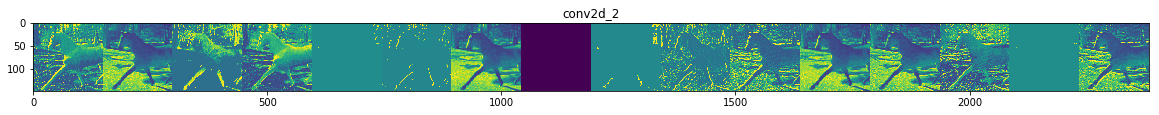

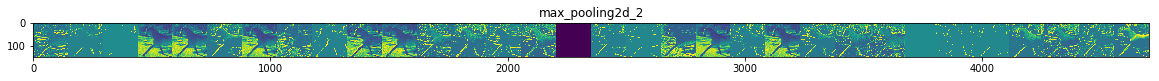

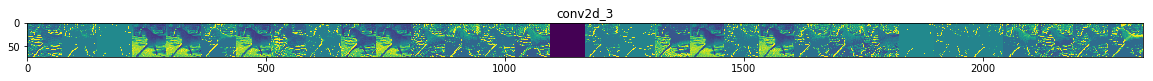

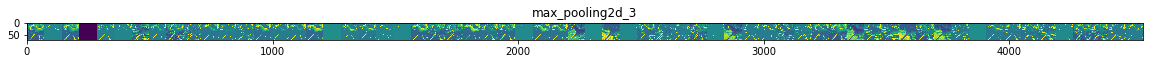

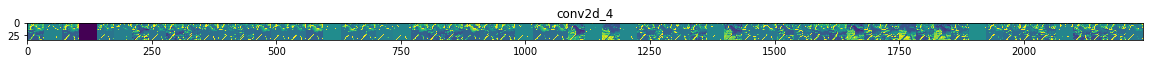

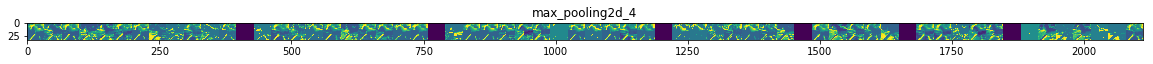

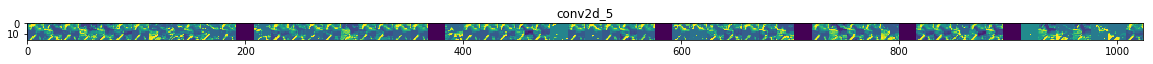

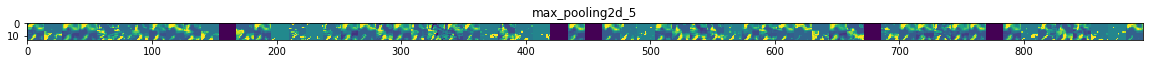

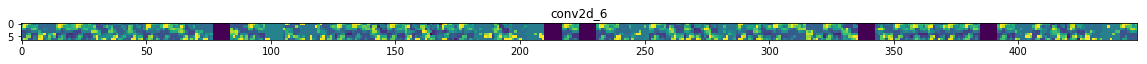

In [58]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# The END!